In [1]:
import pandas as pd #alias for pandas
import numpy as np #alias for numpy 
import matplotlib.pyplot as plt #alias for matplotlib
import datetime

In [2]:
#After running this, it prompts that there are a mix data types in columns 7 and 8
data1 = pd.read_csv('GBA_data.csv')

C:\Users\Derence\AppData\Local\Temp\ipykernel_5176\3344764758.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('GBA_data.csv')


In [3]:
#Hence, here we will convert columns 7 and 8 which are "yob" and "age" to string.
data1 = pd.read_csv ('GBA_data.csv', dtype={ 'yob': 'str', 'age': 'str'})
data1

,origin,destination,start,end,id,type,subscriber,yob,age,gender
0,316.0,311.0,2022-01-01 00:07:41.040,2022-01-01 00:10:06.241,2473,Concession,No,1957,63,Male
1,74.0,70.0,2022-01-01 00:07:52.943,2022-01-01 00:19:47.075,2423,Regular,No,1986,34,Male
2,97.0,125.0,2022-01-01 00:09:31.745,2022-01-01 00:28:43.159,3455,Regular,No,1992,28,Male
3,11.0,323.0,2022-01-01 00:14:37.187,2022-01-01 00:37:16.445,2173,Ad-Hoc,No,1995,25,Male
4,17.0,8.0,2022-01-01 00:15:33.369,2022-01-01 00:58:56.522,1788,Regular,Yes,1994,26,Male
...,...,...,...,...,...,...,...,...,...,...
670004,89.0,30.0,2022-06-18 17:42:34.601,2022-06-18 17:47:38.890,558,Regular,No,1978,42,Male
670005,113.0,110.0,2022-06-18 17:42:37.555,2022-06-18 17:44:43.645,1243,Regular,No,1988,32,Male
670006,109.0,121.0,2022-06-18 17:42:44.010,2022-06-18 17:44:31.715,2403,Regular,No,1980,40,Male
670007,36.0,76.0,2022-06-18 17:42:52.902,2022-06-18 17:59:46.505,2545,Regular,No,1977,43,Male


In [4]:
#We will convert all ‘-’, ‘--’ and ‘?’ into blank cells to subsequently drop all blank cells.
data1.replace('-', np.nan, inplace = True)
data1.replace('--', np.nan, inplace = True)
data1.replace('?', np.nan, inplace = True)
data1.isnull().sum(axis = 0/1)

origin         504
destination    504
start            0
end              0
id               0
type            10
subscriber       0
yob             10
age             10
gender           3
dtype: int64

In [5]:
#As part of the data preparation, we have identified the variable columns with missing values as “origin”, “destination”,“type”, “yob”, “age” and“gender”. The missing values are as described below:
#origin column contains 504 missing values
#destination column contains 504 missing values
#type column contains 10 missing values
#yob column contains 10 missing values
#age column contains 10 missing values
#gender column contains 3 missing values

In [6]:
#To deal with missing data, one should choose to either apply imputation or deletion/removal of the data.
#Since the missing data cannot be determined, we decide to remove the missing data from the data set.
#In particular, we will apply the listwise deletion method to remove the rows containing the missing data. Listwise deletion method is advantageous to large sample volume.

#To delete entire observations that have blanks using the Listwise deletion method.
data1.dropna(how='any', inplace= True)
#check to see if NaN values are replaced.
data1.isnull().sum(axis = 0)

origin         0
destination    0
start          0
end            0
id             0
type           0
subscriber     0
yob            0
age            0
gender         0
dtype: int64

In [7]:
#Splitting the ‘start’ and ‘end’ column into 'start_date', 'start_time', 'end_date' and 'end_time'.
data1[['start_date','start_time']]=data1.start.str.split(' ',expand=True)
data1[['end_date','end_time']]=data1.end.str.split(' ',expand=True)
#Subsequently we drop columns 'start' and 'end' since we no longer require them as we have added the split column as mentioned above.
data1.drop(columns=['start', 'end'], inplace = True)
data1

,origin,destination,id,type,subscriber,yob,age,gender,start_date,start_time,end_date,end_time
0,316.0,311.0,2473,Concession,No,1957,63,Male,2022-01-01,00:07:41.040,2022-01-01,00:10:06.241
1,74.0,70.0,2423,Regular,No,1986,34,Male,2022-01-01,00:07:52.943,2022-01-01,00:19:47.075
2,97.0,125.0,3455,Regular,No,1992,28,Male,2022-01-01,00:09:31.745,2022-01-01,00:28:43.159
3,11.0,323.0,2173,Ad-Hoc,No,1995,25,Male,2022-01-01,00:14:37.187,2022-01-01,00:37:16.445
4,17.0,8.0,1788,Regular,Yes,1994,26,Male,2022-01-01,00:15:33.369,2022-01-01,00:58:56.522
...,...,...,...,...,...,...,...,...,...,...,...,...
670003,61.0,22.0,3391,Regular,No,1985,35,Male,2022-06-18,17:42:30.437,2022-06-18,17:55:04.850
670004,89.0,30.0,558,Regular,No,1978,42,Male,2022-06-18,17:42:34.601,2022-06-18,17:47:38.890
670005,113.0,110.0,1243,Regular,No,1988,32,Male,2022-06-18,17:42:37.555,2022-06-18,17:44:43.645
670006,109.0,121.0,2403,Regular,No,1980,40,Male,2022-06-18,17:42:44.010,2022-06-18,17:44:31.715


In [8]:
#to locate data that was collected in 2023 
data1.loc[(data1['start_date'] >= '2023-01-01')
                     & (data1['start_date'] < '2023-12-31')]
#to drop the data that was collected in 2023
data1.drop(axis = 0, index = [308000, 308001, 308002, 308003, 308004, 308005, 308006, 308007, 308008, 308009], inplace = True)
data1

,origin,destination,id,type,subscriber,yob,age,gender,start_date,start_time,end_date,end_time
0,316.0,311.0,2473,Concession,No,1957,63,Male,2022-01-01,00:07:41.040,2022-01-01,00:10:06.241
1,74.0,70.0,2423,Regular,No,1986,34,Male,2022-01-01,00:07:52.943,2022-01-01,00:19:47.075
2,97.0,125.0,3455,Regular,No,1992,28,Male,2022-01-01,00:09:31.745,2022-01-01,00:28:43.159
3,11.0,323.0,2173,Ad-Hoc,No,1995,25,Male,2022-01-01,00:14:37.187,2022-01-01,00:37:16.445
4,17.0,8.0,1788,Regular,Yes,1994,26,Male,2022-01-01,00:15:33.369,2022-01-01,00:58:56.522
...,...,...,...,...,...,...,...,...,...,...,...,...
670003,61.0,22.0,3391,Regular,No,1985,35,Male,2022-06-18,17:42:30.437,2022-06-18,17:55:04.850
670004,89.0,30.0,558,Regular,No,1978,42,Male,2022-06-18,17:42:34.601,2022-06-18,17:47:38.890
670005,113.0,110.0,1243,Regular,No,1988,32,Male,2022-06-18,17:42:37.555,2022-06-18,17:44:43.645
670006,109.0,121.0,2403,Regular,No,1980,40,Male,2022-06-18,17:42:44.010,2022-06-18,17:44:31.715


In [9]:
#To change start time and end time to datetime to do arithmetic
#identify the type of data start time and end time is currently in 
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669472 entries, 0 to 670007
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   origin       669472 non-null  float64
 1   destination  669472 non-null  float64
 2   id           669472 non-null  int64  
 3   type         669472 non-null  object 
 4   subscriber   669472 non-null  object 
 5   yob          669472 non-null  object 
 6   age          669472 non-null  object 
 7   gender       669472 non-null  object 
 8   start_date   669472 non-null  object 
 9   start_time   669472 non-null  object 
 10  end_date     669472 non-null  object 
 11  end_time     669472 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 66.4+ MB


In [10]:
#change start time and end time to datetime
data1['start_time'] =  pd.to_datetime(data1['start_time'], format='%H:%M:%S.%f')
data1['end_time'] =  pd.to_datetime(data1['end_time'], format='%H:%M:%S.%f')
#to check if it has been changed
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669472 entries, 0 to 670007
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   origin       669472 non-null  float64       
 1   destination  669472 non-null  float64       
 2   id           669472 non-null  int64         
 3   type         669472 non-null  object        
 4   subscriber   669472 non-null  object        
 5   yob          669472 non-null  object        
 6   age          669472 non-null  object        
 7   gender       669472 non-null  object        
 8   start_date   669472 non-null  object        
 9   start_time   669472 non-null  datetime64[ns]
 10  end_date     669472 non-null  object        
 11  end_time     669472 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 66.4+ MB


In [11]:
#subtract end time and start time to find the aggregate of total time travelled
data1['time travelled'] = (data1['end_time'] - data1['start_time'])
data1

,origin,destination,id,type,subscriber,yob,age,gender,start_date,start_time,end_date,end_time,time travelled
0,316.0,311.0,2473,Concession,No,1957,63,Male,2022-01-01,1900-01-01 00:07:41.040,2022-01-01,1900-01-01 00:10:06.241,0 days 00:02:25.201000
1,74.0,70.0,2423,Regular,No,1986,34,Male,2022-01-01,1900-01-01 00:07:52.943,2022-01-01,1900-01-01 00:19:47.075,0 days 00:11:54.132000
2,97.0,125.0,3455,Regular,No,1992,28,Male,2022-01-01,1900-01-01 00:09:31.745,2022-01-01,1900-01-01 00:28:43.159,0 days 00:19:11.414000
3,11.0,323.0,2173,Ad-Hoc,No,1995,25,Male,2022-01-01,1900-01-01 00:14:37.187,2022-01-01,1900-01-01 00:37:16.445,0 days 00:22:39.258000
4,17.0,8.0,1788,Regular,Yes,1994,26,Male,2022-01-01,1900-01-01 00:15:33.369,2022-01-01,1900-01-01 00:58:56.522,0 days 00:43:23.153000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670003,61.0,22.0,3391,Regular,No,1985,35,Male,2022-06-18,1900-01-01 17:42:30.437,2022-06-18,1900-01-01 17:55:04.850,0 days 00:12:34.413000
670004,89.0,30.0,558,Regular,No,1978,42,Male,2022-06-18,1900-01-01 17:42:34.601,2022-06-18,1900-01-01 17:47:38.890,0 days 00:05:04.289000
670005,113.0,110.0,1243,Regular,No,1988,32,Male,2022-06-18,1900-01-01 17:42:37.555,2022-06-18,1900-01-01 17:44:43.645,0 days 00:02:06.090000
670006,109.0,121.0,2403,Regular,No,1980,40,Male,2022-06-18,1900-01-01 17:42:44.010,2022-06-18,1900-01-01 17:44:31.715,0 days 00:01:47.705000


In [12]:
#For question 1d, we will re-run and re-read the original csv.
#This time round we will name it data2.
#Similarly, it prompts that there are a mix data types in columns 7 and 8.
data2= pd.read_csv('GBA_data.csv')

C:\Users\Derence\AppData\Local\Temp\ipykernel_5176\800684995.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data2= pd.read_csv('GBA_data.csv')


In [13]:
#Hence, here we will convert columns 7 and 8 which are "yob" and "age" to string.
data2= pd.read_csv ('GBA_data.csv', dtype={ 'yob': 'str', 'age': 'str'})
data2

def modeHour(): #creating def function
    data2['start'] = pd.to_datetime(data2['start']) #convert start column to datetime format
    data2['start'].dt.strftime('%I %p') #converting datetime to 12hr format
    data2['starttime'] = data2.start.dt.strftime('%I %p') #creating starttime as 12 hour format
    start = data2['starttime'].mode() #highest frequency is mode therefore, finding mode
    return start # return the mode value to function
modeHour()

0    05 PM
Name: starttime, dtype: object

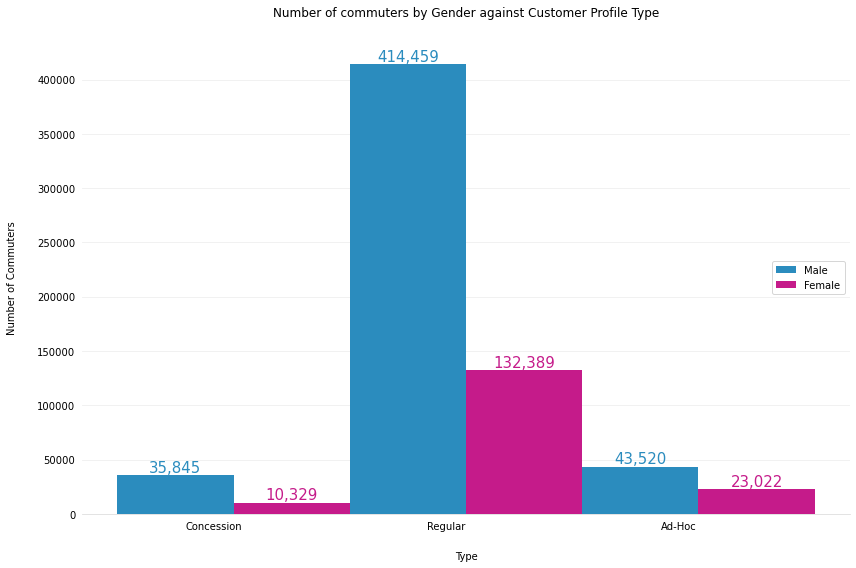

In [14]:
#Here we plot a bar chart for the number of consumers in the different types split by gender (Figure 1).
fig, ax = plt.subplots(figsize=(12, 8)) #size of chart
types = ['Concession', 'Regular', 'Ad-Hoc'] #Column value
xpos = np.arange(len(types))
bar_width = 0.5 

maleconces = data1[(data1['type'] == 'Concession') & (data1['gender'] == 'Male')].count()[0] #count of data for male and concession
malereg = data1[(data1['type'] == 'Regular') & (data1['gender'] == 'Male')].count()[0] #count of data for male and regular
maleadhoc = data1[(data1['type'] == 'Ad-Hoc') & (data1['gender'] == 'Male')].count()[0] #count of data for male and adhoc
femaleconces = data1[(data1['type'] == 'Concession') & (data1['gender'] == 'Female')].count()[0]  #count of data for female and concession
femalereg = data1[(data1['type'] == 'Regular') & (data1['gender'] == 'Female')].count()[0] #count of data for female and regular
femaleadhoc = data1[(data1['type'] == 'Ad-Hoc') & (data1['gender'] == 'Female')].count()[0] #count of data for female and adhoc
male = (maleconces, malereg, maleadhoc) #Consolidate male values
female = (femaleconces,  femalereg, femaleadhoc) #Consolidate female values

b1 = ax.bar(xpos, male,width=bar_width, label='Male', color = '#2b8cbe') #male column  
b2 = ax.bar(xpos + bar_width, female,width=bar_width, label='Female', color = '#c51b8a') # female column
ax.set_xticks(xpos + bar_width / 3) #position 
ax.set_xticklabels(types) # label for bar 
ax.legend(loc = 'center right') # legend position

ax.spines['top'].set_visible(False) #axis style
ax.spines['right'].set_visible(False) #axis style
ax.spines['left'].set_visible(False) #axis style
ax.spines['bottom'].set_color('#DDDDDD') #axis style
ax.tick_params(bottom=False, left=False) #axis style
ax.set_axisbelow(True) #axis style
ax.yaxis.grid(True, color='#EEEEEE') #axis style
ax.xaxis.grid(False) #axis style
ax.set_xlabel('Type', labelpad=20) #x axis label
ax.set_ylabel('Number of Commuters', labelpad=20) #y axis label
ax.set_title('Number of commuters by Gender against Customer Profile Type', pad=25) #chart title
fig.tight_layout()

for bar in ax.patches:
  bar_value = bar.get_height() #get bar value
  text = f'{bar_value:,}' #data point is bar value
  text_x = bar.get_x() + bar.get_width() / 2 #position data value
  text_y = bar.get_y() + bar_value
  bar_color = bar.get_facecolor() #default style
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=15)

In [15]:
#Here we wish to gain insights on the drivers in terms of age thus we will convert the age to int and then we extract the column and name it data2.
data1 = data1.astype({"age":"int"})
data2 = data1.age
data2

0         63
1         34
2         28
3         25
4         26
          ..
670003    35
670004    42
670005    32
670006    40
670007    43
Name: age, Length: 669472, dtype: int32

(array([135673., 302841., 135987.,  70948.,  22374.,   1649.]),
 array([20, 30, 40, 50, 60, 70, 80]),
 <BarContainer object of 6 artists>)

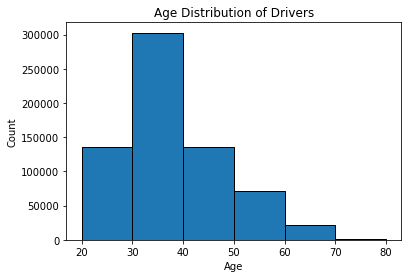

In [16]:
#Here we plot a histogram for the distribution of age (Figure 2).
Age = (data2)
bins = (20, 30, 40, 50, 60, 70, 80)
plt.title('Age Distribution of Drivers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(Age, bins=bins, edgecolor='black')

In [ ]:
data1['age'] = pd.to_numeric(data1['age']) #converting age column from object to integer
agegroup = [] #creating new column to group age
for age in data1['age']:
    if age < 30:
        group = ['Age below 30'] # grouping age below 30
    elif age >= 30 and age < 40:
        group = ['Age between 30 to 39'] #grouping age between 30 to 39
    elif age >= 40 and age < 50:
        group = ['Age between 40 to 49'] #grouping age between 40 to 49
    elif age >= 50 and age < 60:
        group = ['Age between 50 to 59'] #grouping age between 50 to 59
    elif age >= 60:
        group = ['Age 60 and above'] #grouping age 60 and above
    agegroup = agegroup + group
data1['agegroup'] = agegroup
sub30 = len(data1[(data1['subscriber'] == 'Yes') & (data1['agegroup'] == 'Age below 30')]) #count subscriber below 30
sub3040 = len(data1[(data1['subscriber'] == 'Yes') & (data1['agegroup'] == 'Age between 30 to 39')]) #count subscriber  between 30 to 39
sub4050 = len(data1[(data1['subscriber'] == 'Yes') & (data1['agegroup'] == 'Age between 40 to 49')]) #count subscriber between 40 to 49
sub5060 = len(data1[(data1['subscriber'] == 'Yes') & (data1['agegroup'] == 'Age between 50 to 59')]) #count subscriber between 50 to 59
sub60 = len(data1[(data1['subscriber'] == 'Yes') & (data1['agegroup'] == 'Age 60 and above')]) #count subscriber 60 and above
nosub30 = len(data1[(data1['subscriber'] == 'No') & (data1['agegroup'] == 'Age below 30')]) #count non subscriber below 30
nosub3040 = len(data1[(data1['subscriber'] == 'No') & (data1['agegroup'] == 'Age between 30 to 39')]) #count non subscriber  between 30 to 39
nosub4050 = len(data1[(data1['subscriber'] == 'No') & (data1['agegroup'] == 'Age between 40 to 49')])  #count non subscriber between 40 to 49
nosub5060 = len(data1[(data1['subscriber'] == 'No') & (data1['agegroup'] == 'Age between 50 to 59')])  #count non subscriber between 50 to 59
nosub60 = len(data1[(data1['subscriber'] == 'No') & (data1['agegroup'] == 'Age 60 and above')]) #count non subscriber 60 and above

raw = pd.DataFrame([['Age below 30', sub30, nosub30], ['Age between 30 to 39', sub3040, nosub3040], ['Age between 40 to 49', sub4050, nosub4050],
['Age between 50 to 59', sub5060, nosub5060], ['Age 60 and above', sub60, nosub60]],
                  columns=['Age Group', 'Yes', 'No']) #create data frame for graph values
raw.plot.barh(stacked=True, title='Subscribers by Age Group', color=("orange", "cyan"), x= 'Age Group') #plot the graph
plt.show()